In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ЗАГРУЗКА ДАТАСЕТА

In [2]:
train_path = r'..\lab_3\dataset\train.csv'

df = pd.read_csv(train_path)

ОБРАБОТКА ДАТАСЕТА

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical = ['blue', 'dual_sim', 'four_g', 'm_dep', 'price_range', 'n_cores', 'three_g', 'touch_screen', 'wifi']
for feature in categorical:
    df[feature] = le.fit_transform(df[feature])

In [4]:
target = 'price_range'
y = df[target]
X = df.drop(columns=[target])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
num_nan = int(X_train.shape[0] * 0.2)

rows, cols = X_train.shape
for _ in range(num_nan):
    random_row = np.random.randint(0, rows)
    random_col = np.random.randint(0, cols)
    X_train.iloc[random_row, random_col] = np.nan

print("\nDataFrame с NaN значениями:")
X_train.head(10)


DataFrame с NaN значениями:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923.0,0.0,0.5,1.0,7.0,0.0,46.0,4.0,191.0,0.0,10.0,767.0,1759.0,1489.0,10.0,9.0,3.0,1.0,1.0,1.0
240,633.0,1.0,2.2,0.0,NaN,1.0,49.0,0.0,139.0,7.0,1.0,529.0,1009.0,3560.0,11.0,1.0,16.0,1.0,1.0,1.0
819,1236.0,0.0,0.9,1.0,2.0,1.0,57.0,0.0,188.0,0.0,14.0,517.0,809.0,1406.0,14.0,12.0,20.0,1.0,0.0,1.0
692,781.0,0.0,1.1,0.0,2.0,0.0,38.0,3.0,198.0,4.0,7.0,304.0,1674.0,3508.0,13.0,8.0,NaN,0.0,0.0,1.0
420,1456.0,1.0,0.5,1.0,7.0,0.0,7.0,3.0,105.0,4.0,12.0,823.0,1104.0,1587.0,6.0,5.0,20.0,1.0,0.0,1.0
1085,1741.0,1.0,0.5,0.0,1.0,1.0,55.0,0.0,140.0,4.0,3.0,719.0,755.0,2575.0,13.0,10.0,7.0,1.0,1.0,1.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.0,145.0,4.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0
365,763.0,0.0,1.7,1.0,8.0,1.0,2.0,4.0,92.0,7.0,14.0,1028.0,1186.0,1050.0,6.0,4.0,8.0,1.0,1.0,0.0
1022,1099.0,0.0,0.5,0.0,13.0,1.0,61.0,2.0,146.0,2.0,20.0,393.0,1096.0,1699.0,17.0,10.0,3.0,1.0,1.0,1.0
1240,1994.0,1.0,0.8,1.0,2.0,1.0,7.0,5.0,88.0,7.0,4.0,667.0,711.0,454.0,11.0,8.0,6.0,1.0,1.0,0.0


In [7]:
C=len(X_train.columns)
L=len(X_train.index)
CN=X_train.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=X_train.min() #минимум
Q1=X_train.quantile(q=0.25) #первый квартиль
MA=X_train.mean() #среднее значение
ME=X_train.median() #медиана
Q3=X_train.quantile(q=0.75) #третий квартиль
MX=X_train.max() #максимум
ST=X_train.std() #стандартное отклонение
P=X_train.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
Количество,1588.000000,1585.000000,1580.000000,1589.000000,1581.000000,1582.000000,1581.000000,1586.000000,1586.000000,1588.000000,1587.000000,1590.000000,1575.000000,1578.000000,1586.000000,1578.000000,1588.000000,1582.000000,1585.000000,1587.000000
Процент пропусков,0.750000,0.937500,1.250000,0.687500,1.187500,1.125000,1.187500,0.875000,0.875000,0.750000,0.812500,0.625000,1.562500,1.375000,0.875000,1.375000,0.750000,1.125000,0.937500,0.812500
Минимум,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.000000,80.000000,0.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
Первый квартиль,853.500000,0.000000,0.675000,0.000000,1.000000,0.000000,16.000000,1.000000,109.000000,2.000000,5.000000,280.250000,873.500000,1215.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
Среднее,1240.671285,0.491483,1.511139,0.514789,4.321316,0.521492,32.264390,4.023960,140.477932,3.539673,9.892880,645.762893,1248.160635,2118.552598,12.212484,5.726236,10.960957,0.764223,0.503470,0.497164
Медиана,1230.500000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,4.000000,141.000000,3.000000,10.000000,560.500000,1239.000000,2112.000000,12.000000,5.000000,11.000000,1.000000,1.000000,0.000000
Третий квартиль,1619.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,6.750000,171.000000,6.000000,15.000000,949.500000,1622.500000,3038.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
Максимум,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,9.000000,200.000000,7.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000
Стандартное отклонение,440.713855,0.500085,0.819167,0.499939,4.345576,0.499696,18.158401,2.867537,35.344467,2.290841,6.008285,445.956124,431.854760,1078.072227,4.207354,4.347007,5.512864,0.424618,0.500146,0.500150
Мощность,970.000000,2.000000,26.000000,2.000000,20.000000,2.000000,63.000000,10.000000,121.000000,8.000000,21.000000,1011.000000,993.000000,1282.000000,15.000000,19.000000,19.000000,2.000000,2.000000,2.000000


In [8]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [9]:
print(f'X_train {X_train.shape}, y_train {y_train.shape}')

X_train (1600, 20), y_train (1600,)


ЭТАЛОННАЯ РЕАЛИЗАЦИЯ ПО КРИТЕРИЮ ЭНТРОПИИ

In [10]:
from sklearn.tree import DecisionTreeClassifier

ref_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
ref_tree.fit(X_train, y_train)
y_ref_pred = ref_tree.predict(X_test)

КАСТОМНАЯ РЕАЛИЗАЦИЯ ПО КРИТЕРИЯМ ДОНСКОГО И ЭНТРОПИИ

In [11]:
from criteria import donskoy_criteria, multiclass_entropy_criterion
from decision_tree_classification import decision_tree_classifier


custom_tree_donskoy = decision_tree_classifier(X_train, y_train, classes=np.unique(y), criteria=donskoy_criteria, max_depth=7)
custom_tree_entropy = decision_tree_classifier(X_train, y_train, classes=np.unique(y), criteria=multiclass_entropy_criterion, max_depth=7)

prob_donskoy = custom_tree_donskoy.predict(X_test)
prob_entropy = custom_tree_entropy.predict(X_test)

y_donskoy_pred = np.argmax(prob_donskoy, axis=1)
y_entropy_pred = np.argmax(prob_entropy, axis=1)

In [12]:
from pruning import prune_classification_tree

# Обрезка дерева
pruned_tree = prune_classification_tree(custom_tree_entropy, X_train, y_train)

# Функция для оценки точности
def evaluate_tree(tree, X, y):
    predictions = tree.predict(X)
    accuracy = np.mean(np.argmax(predictions, axis=1) == y)
    return accuracy

# Оценка до и после обрезки
accuracy_before = evaluate_tree(custom_tree_entropy, X_test, y_test)
accuracy_after = evaluate_tree(pruned_tree, X_test, y_test)

print(f"Accuracy before pruning: {accuracy_before:.2f}")
print(f"Accuracy after pruning: {accuracy_after:.2f}")


Минимальная ошибка по индексу - 0: 0.05875
Минимальная ошибка по индексу - 0: 0.059178743961352656
Минимальная ошибка по индексу - 0: 0.027522935779816515
Минимальная ошибка по индексу - 0: 0.02903225806451613
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.06802721088435375
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.12345679012345678
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.5
Минимальная ошибка по индексу - 0: 0.23255813953488372
Минимальная ошибка по индексу - 0: 0.058823529411764705
Минимальная ошибка по индексу - 0: 0.34615384615384615
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.0
Минимальная ошибка по индексу - 0: 0.07984031936127745
Минимальная ошибка по индексу - 0: 0.023809523809523808
Минимальная ошибка по индексу - 0: 0.030927835051546393
Минимальная ошибка по индексу - 0: 

In [13]:
from visualization import visualize_tree

visualize_tree(custom_tree_donskoy, 'images/donskoy.png', 'classification', 'custom', 7)
visualize_tree(custom_tree_entropy, 'images/entropy.png', 'classification', 'custom', 7)
visualize_tree(pruned_tree, 'images/pruning.png', 'classification', 'custom', 7)

МЕТРИКИ

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# 3. Вычисление и вывод метрик
def print_metrics(y_true, y_pred, model_name):
    print(f"\nМетрики для модели: {model_name}")
    print("-" * 40)
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Вывод метрик
print_metrics(y_test, y_ref_pred, "Эталонная модель (scikit-learn)")
print_metrics(y_test, y_donskoy_pred, "Кастомная модель (Донской)")
print_metrics(y_test, y_entropy_pred, "Кастомная модель (Энтропия)")



Метрики для модели: Эталонная модель (scikit-learn)
----------------------------------------
Accuracy: 0.8675
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       105
           1       0.81      0.87      0.84        91
           2       0.81      0.80      0.81        92
           3       0.89      0.90      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.87      0.87       400


Метрики для модели: Кастомная модель (Донской)
----------------------------------------
Accuracy: 0.8600
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       105
           1       0.80      0.81      0.81        91
           2       0.77      0.83      0.80        92
           3       0.93      0.88      0.90       112

    accuracy                  

# РЕГРЕССИЯ

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка датасета
data = fetch_california_housing(as_frame=True)

# Данные и целевая переменная
X = data.data  # Признаки
y = data.target  # Целевая переменная

# Создание DataFrame для удобства анализа
df = pd.concat([X, y], axis=1)
df.columns = list(X.columns) + ["target"]

# Вывод первых 5 строк для проверки
print(df.head())

# Дополнительно: информация о датасете
print(data.DESCR)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
  

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.to_numpy().reshape(-1, 1))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeRegressor

sklearn_reg = DecisionTreeRegressor()
sklearn_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
from criteria import mse_criteria
from decision_tree_regression import decision_tree_regressor

custom_reg = decision_tree_regressor(X_train, y_train, criteria=mse_criteria, max_depth=8)

In [20]:
y_custom_reg = custom_reg.predict(X_test)
y_sklearn_reg = sklearn_reg.predict(X_test)

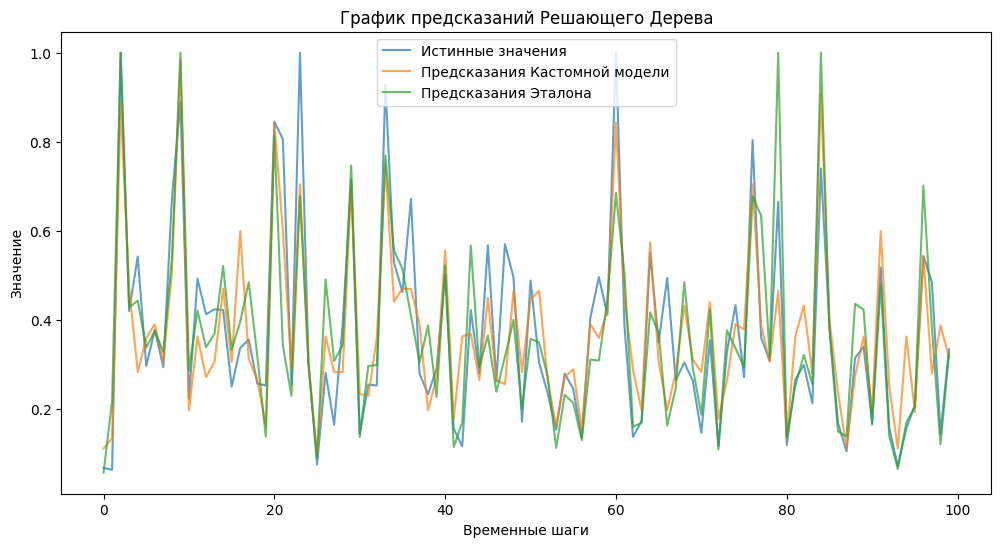

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Истинные значения", alpha=0.7)
plt.plot(y_custom_reg[:100], label="Предсказания Кастомной модели", alpha=0.7)
plt.plot(y_sklearn_reg[:100], label="Предсказания Эталона", alpha=0.7)
plt.title("График предсказаний Решающего Дерева")
plt.xlabel("Временные шаги")
plt.ylabel("Значение")
plt.legend()
plt.show()